In [3]:
## EDA of the source data

## import all the libs

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import biopandas as bpd
from biopandas.pdb import PandasPdb
import pandas_profiling
from IPython.core.display import display, HTML

# visualization

import plotly.express as px
import plotly.graph_objects as go

In [4]:
## import data sets

df_sample_sub = pd.read_csv('sample_submission.csv')
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')
df_train_upd=pd.read_csv('train_updates_20220929.csv')


ppdb = PandasPdb()
df_stprd = ppdb.read_pdb('wildtype_structure_prediction_af2.pdb')

In [136]:
df_sample_sub.head()

seq_id  tm
0   31390   0
1   31391   1
2   31392   2
3   31393   3
4   31394   4

In [137]:
df_test.describe()

seq_id   pH
count      5.000000  5.0
mean   29993.000000  8.0
std        1.581139  0.0
min    29991.000000  8.0
25%    29992.000000  8.0
50%    29993.000000  8.0
75%    29994.000000  8.0
max    29995.000000  8.0

In [138]:
df_test.head()

seq_id                                   protein_sequence  pH data_source
0   29991  QLVERMQTDTLEYQCDEKPLTVKLNNPRQEVSFVYDNQLLHLKQGI...   8   Novozymes
1   29992  QLVPAIMTFGDSVVDVGNNNYLPTLFRADYPPYGRDFANHKATGRF...   8   Novozymes
2   29993  QLWLVLRYRHKRLSYQSVFLFLCLFWASLRTVLFSFYFRDFVAANS...   8   Novozymes
3   29994  QMELHVPPGLNKLEAVEGEEVVLPAWYTMAREESWSHPREVPILIW...   8   Novozymes
4   29995  QMLGTYNGDSKAETDGKDNSICHICSDVATGRHYGAIACNGCKGFF...   8   Novozymes

In [139]:
df_train.head()

seq_id                                   protein_sequence   pH  \
0      0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1      1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2      2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3      3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4      4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   

                         data_source    tm  
0  doi.org/10.1038/s41592-020-0801-4  75.7  
1  doi.org/10.1038/s41592-020-0801-4  50.5  
2  doi.org/10.1038/s41592-020-0801-4  40.5  
3  doi.org/10.1038/s41592-020-0801-4  47.2  
4  doi.org/10.1038/s41592-020-0801-4  49.5

In [140]:
df_train.describe()

pH            tm
count  29698.000000  29984.000000
mean       6.888060     49.090755
std        1.648579     14.139715
min        1.990000     -1.000000
25%        7.000000     42.000000
50%        7.000000     48.000000
75%        7.000000     53.900000
max       64.900000    130.000000

In [141]:
df_train.isnull().sum()

seq_id                 7
protein_sequence       7
pH                   307
data_source         3348
tm                    21
dtype: int64

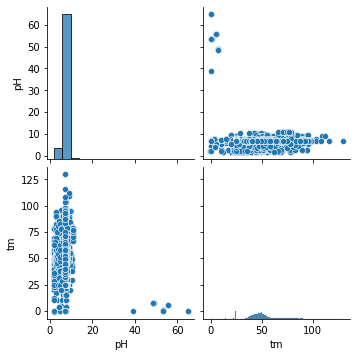

In [142]:
sns.pairplot(df_train);

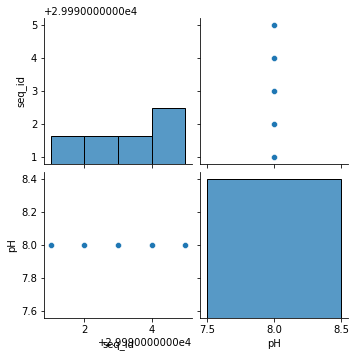

In [143]:
sns.pairplot(df_test);

In [144]:
df_atom = df_stprd.df['ATOM']

In [145]:
df_stprd.df['ATOM'].head(2)

record_name  atom_number blank_1 atom_name alt_loc residue_name blank_2  \
0        ATOM            1                 N                  VAL           
1        ATOM            2                 H                  VAL           

  chain_id  residue_number insertion  ... x_coord  y_coord  z_coord  \
0        A               1            ...  34.064   -6.456   50.464   
1        A               1            ...  33.576   -6.009   51.228   

   occupancy  b_factor  blank_4 segment_id element_symbol charge  line_idx  
0        1.0     45.11                                  N    NaN         0  
1        1.0     45.11                                  H    NaN         1  

[2 rows x 21 columns]

In [73]:
df_stprd.df['ATOM'].dtypes

record_name        object
atom_number         int32
blank_1            object
atom_name          object
alt_loc            object
residue_name       object
blank_2            object
chain_id           object
residue_number      int32
insertion          object
blank_3            object
x_coord           float64
y_coord           float64
z_coord           float64
occupancy         float64
b_factor          float64
blank_4            object
segment_id         object
element_symbol     object
charge            float64
line_idx            int64
dtype: object

In [6]:
df_train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [164]:
df_train.dtypes


seq_id                int64
protein_sequence     object
pH                  float64
data_source          object
tm                  float64
dtype: object

In [166]:
df_test.dtypes

seq_id               int64
protein_sequence    object
pH                   int64
data_source         object
dtype: object

In [148]:
import plotly.express as px
fig = px.scatter_3d(df_atom, x = "x_coord",
                    y = "y_coord",
                    z = "z_coord",
                    color = "atom_name")
fig.update_traces(marker = dict(size = 3))
fig.update_coloraxes(showscale = True)
fig.update_layout(template = "plotly_dark")
fig.show()

In [76]:
df_atom.head()

record_name  atom_number blank_1 atom_name alt_loc residue_name blank_2  \
0        ATOM            1                 N                  VAL           
1        ATOM            2                 H                  VAL           
2        ATOM            3                H2                  VAL           
3        ATOM            4                H3                  VAL           
4        ATOM            5                CA                  VAL           

  chain_id  residue_number insertion  ... x_coord  y_coord  z_coord  \
0        A               1            ...  34.064   -6.456   50.464   
1        A               1            ...  33.576   -6.009   51.228   
2        A               1            ...  33.882   -7.449   50.477   
3        A               1            ...  35.060   -6.323   50.566   
4        A               1            ...  33.643   -5.877   49.162   

   occupancy  b_factor  blank_4 segment_id element_symbol charge  line_idx  
0        1.0     45.11                                  N    NaN         0  
1        1.0     45.11                                  H    NaN         1  
2        1.0     45.11                                  H    NaN         2  
3        1.0     45.11                                  H    NaN         3  
4        1.0     45.11                                  C    NaN         4  

[5 rows x 21 columns]

In [77]:
df_atom.tail()

record_name  atom_number blank_1 atom_name alt_loc residue_name blank_2  \
3312        ATOM         3313                NZ                  LYS           
3313        ATOM         3314               HZ1                  LYS           
3314        ATOM         3315               HZ2                  LYS           
3315        ATOM         3316               HZ3                  LYS           
3316        ATOM         3317               OXT                  LYS           

     chain_id  residue_number insertion  ... x_coord  y_coord  z_coord  \
3312        A             221            ...   4.616   13.323   -4.301   
3313        A             221            ...   5.270   12.565   -4.432   
3314        A             221            ...   4.585   13.517   -3.310   
3315        A             221            ...   4.965   14.143   -4.776   
3316        A             221            ...   1.511   13.763  -11.203   

      occupancy  b_factor  blank_4 segment_id element_symbol charge  line_idx  
3312        1.0      93.8                                  N    NaN      3312  
3313        1.0      93.8                                  H    NaN      3313  
3314        1.0      93.8                                  H    NaN      3314  
3315        1.0      93.8                                  H    NaN      3315  
3316        1.0      93.8                                  O    NaN      3316  

[5 rows x 21 columns]

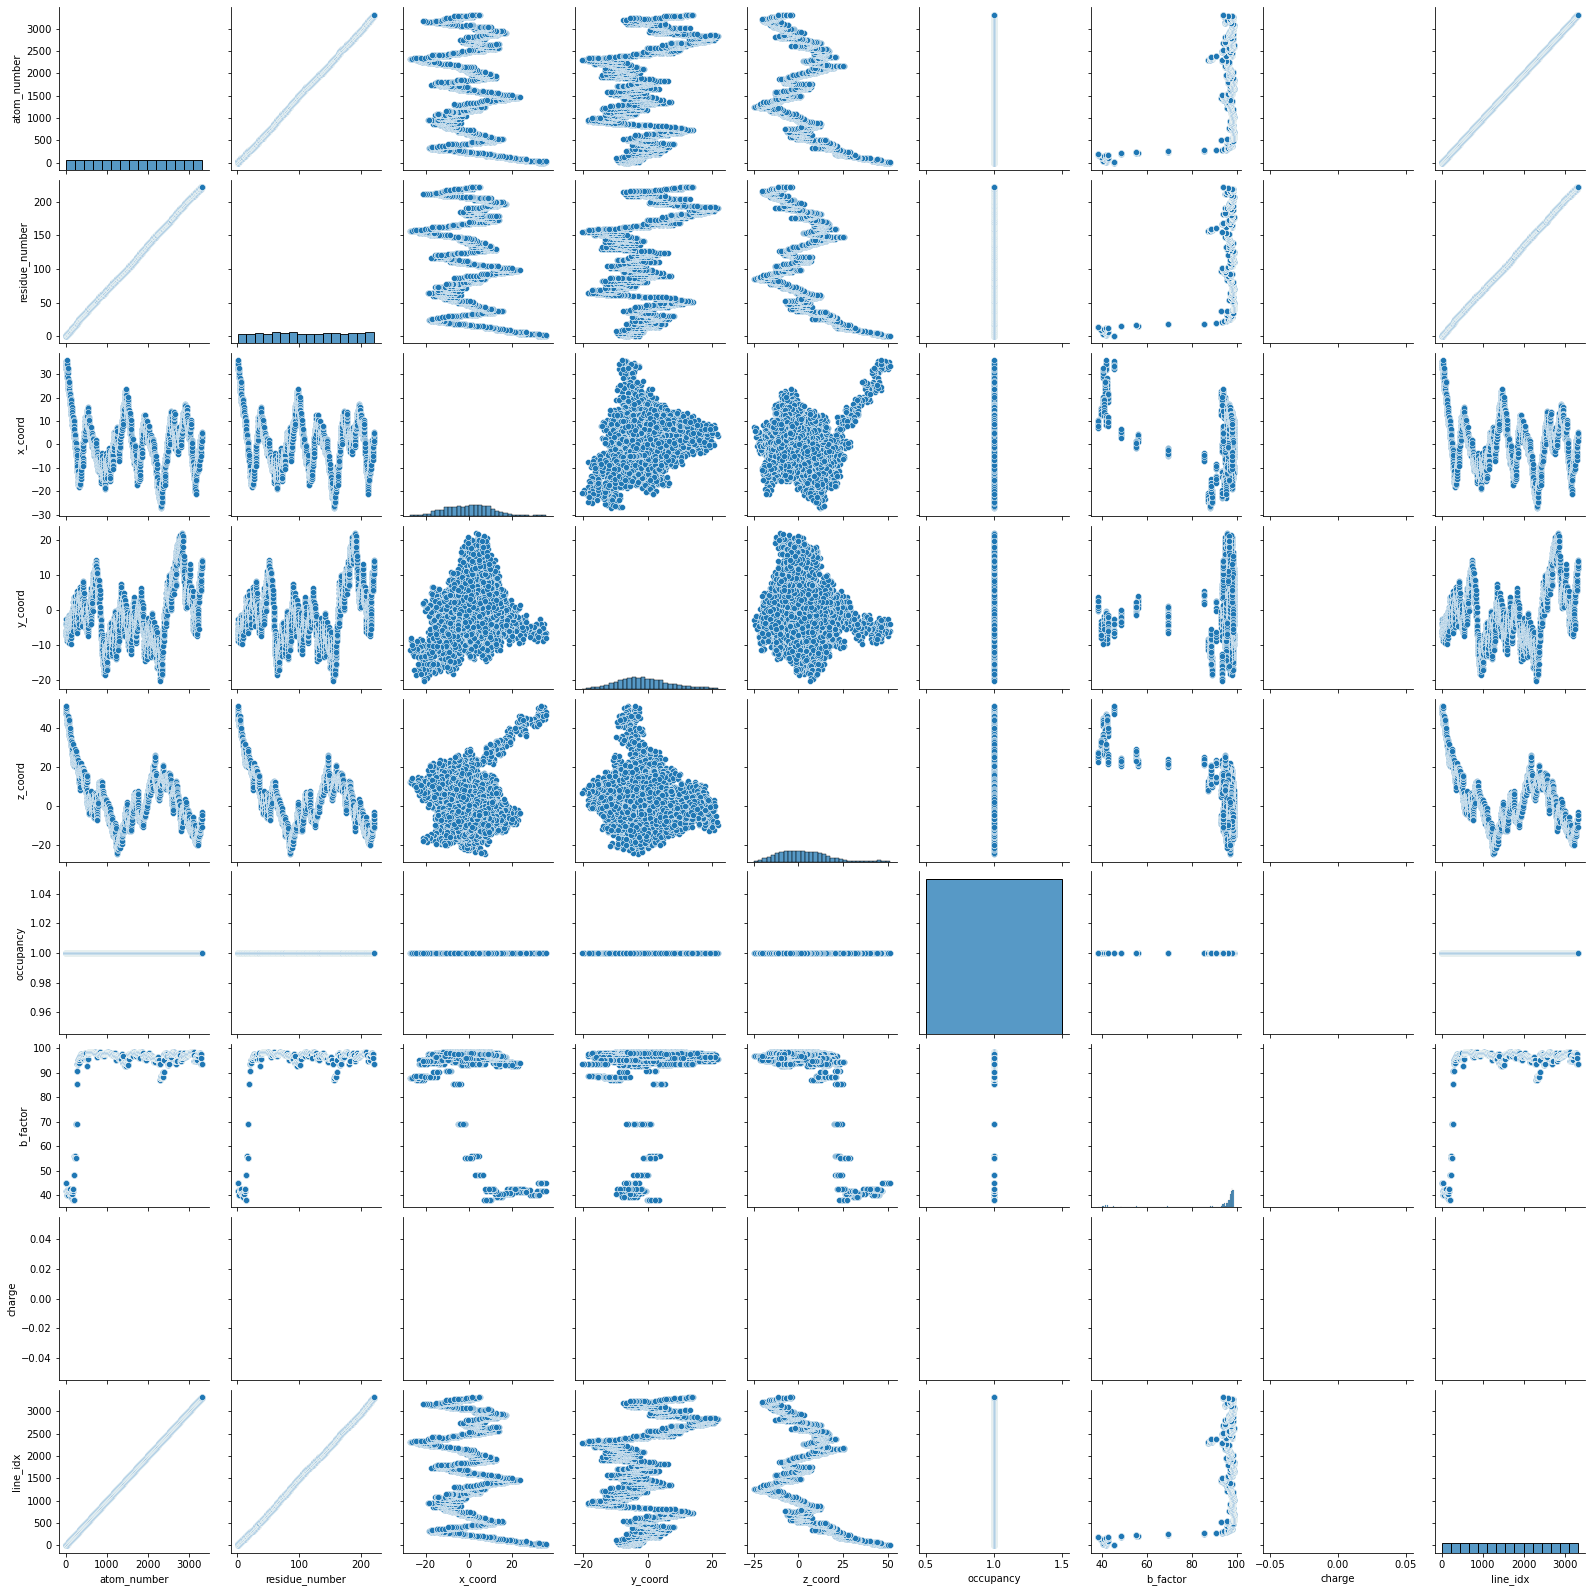

In [78]:

sns.pairplot(df_atom);

In [79]:
df_atom.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [189]:
df_train['protein_sequence']= df_train['protein_sequence'].astype(str)

df_train["protein_sequence_len"] = df_train["protein_sequence"].apply(lambda x: len(x))
df_test["protein_sequence_len"] = df_test["protein_sequence"].apply(lambda x: len(x))
print("----------- TRAIN -----------")
display(df_train[["protein_sequence_len"]].describe())
print("----------- TEST -----------")
display(df_test[["protein_sequence_len"]].describe())

----------- TRAIN -----------


protein_sequence_len
count          31390.000000
mean             447.669513
std              640.728935
min                5.000000
25%              197.000000
50%              336.000000
75%              523.000000
max            32767.000000

----------- TEST -----------


protein_sequence_len
count           1399.000000
mean             475.275197
std              436.098774
min                5.000000
25%              251.000000
50%              382.000000
75%              552.000000
max             5332.000000

seq_id                                   protein_sequence  pH data_source
0   29995  QMLGTYNGDSKAETDGKDNSICHICSDVATGRHYGAIACNGCKGFF...   8   Novozymes

92

In [190]:




from scipy.sparse import csr_matrix

df_train = df_train[df_train["protein_sequence_len"]<=221]
df_train.reset_index(inplace=True)
sequences = [list(string) for string in df_train["protein_sequence"].values.tolist()]
sequences_train = pd.DataFrame(sequences)
sequences_train.head()


0   1   2   3   4   5   6   7   8   9    ...   211   212   213   214   215  \
0   A   A   F   Q   V   T   S   N   E   I  ...  None  None  None  None  None   
1   A   A   G   G   Q   P   Q   G   A   T  ...     A     Q     Q     Q     C   
2   A   A   I   G   I   G   I   L   G   G  ...  None  None  None  None  None   
3   A   A   K   S   G   D   A   E   E   A  ...  None  None  None  None  None   
4   A   A   L   A   L   G   L   P   A   F  ...  None  None  None  None  None   

    216   217   218   219   220  
0  None  None  None  None  None  
1     N  None  None  None  None  
2  None  None  None  None  None  
3  None  None  None  None  None  
4  None  None  None  None  None  

[5 rows x 221 columns]

In [191]:
from sklearn.preprocessing import LabelEncoder

sequences_train = sequences_train.apply(LabelEncoder().fit_transform)
sequences_train["tm"] = df_train["tm"]
sequences_train.head()

0  1  2   3   4   5   6   7  8   9  ...  212  213  214  215  216  217  218  \
0  0  0  4  13  17  16  15  11  3   7  ...   20   19   20   20   20   20   20   
1  0  0  5   5  13  12  13   5  0  16  ...   13   13   13    1   11   20   20   
2  0  0  7   5   7   5   7   9  5   5  ...   20   19   20   20   20   20   20   
3  0  0  8  15   5   2   0   3  3   0  ...   20   19   20   20   20   20   20   
4  0  0  9   0   9   5   9  12  0   4  ...   20   19   20   20   20   20   20   

   219  220    tm  
0   20   18  49.7  
1   20   18  45.1  
2   20   18  62.8  
3   20   18  36.3  
4   20   18  83.0  

[5 rows x 222 columns]

In [24]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = sequences_train.loc[:, sequences_train.columns != "tm"]
y = sequences_train.loc[:, sequences_train.columns == "tm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create an xgboost regression model
model = xgb.XGBRegressor(n_estimators=500, max_depth=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

NameError: name 'sequences_train' is not defined

In [193]:
from scipy import stats

stats.spearmanr(y_test, y_pred)
stats.pearsonr(y_test, y_pred)

SpearmanrResult(correlation=0.3547764232104556, pvalue=9.909469529327458e-55)

In [194]:
from scipy.sparse import csr_matrix

df_test = df_test[df_test["protein_sequence_len"]<=221]
sequences = [list(string) for string in df_test["protein_sequence"].values.tolist()]
sequences_test = pd.DataFrame(sequences)
sequences_test = sequences_test.apply(LabelEncoder().fit_transform)
sequences_test.head()

0    1    2    3    4    5    6    7    8    9    ...  211  212  213  214  \
0    0    9   17    3   14   10   13   16    2   16  ...   13   10   12    7   
1    0   10   12   15   17    1    0    0   14   13  ...   13   10   12    7   
2    0   11    2   13   13   17   16    4   11   19  ...   13   10   12    7   
3    0   11    6    9    3    7   11    2   18    3  ...   13   10   12    7   
4    0   12    3    2   16   17   13    4   14    7  ...   13   10   12    7   

   215  216  217  218  219  220  
0    9    6    5    5    3    1  
1    9    6    5    5    3    1  
2    9    6    5    5    3    1  
3    9    6    5    5    3    1  
4    9    6    5    5    3    1  

[5 rows x 221 columns]

In [195]:
submission = pd.DataFrame()
submission["tm"] = model.predict(sequences_test)
submission["seq_id"] = df_test["seq_id"]
submission.to_csv("submission.csv", index=False)

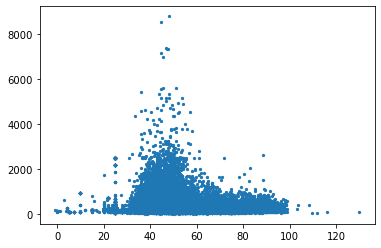

In [23]:
## scatter plot of train tm vs sequence lengeth
df_train['protein_sequence']= df_train['protein_sequence'].astype(str)

df_train["protein_sequence_len"] = df_train["protein_sequence"].apply(lambda x: len(x))

import matplotlib.pyplot as plt

df_train_trun = df_train[df_train["protein_sequence_len"] < 15000]

x = df_train_trun['tm']
y = df_train_trun['protein_sequence_len']

plt.scatter(x, y,s = 5)
plt.show()
